In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv('Train.csv')
train.head()

,Unnamed: 0,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Electric_Range
0,0,5YJSA1DN0C,Thurston,Olympia,WA,98502.0,2012,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,59900.0,22.0,186637195,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10,265.0
1,1,WBY1Z6C30H,King,Bellevue,WA,98004.0,2017,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.0,48.0,196789610,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,81.0
2,2,WBY7Z6C52J,King,Kent,WA,98031.0,2018,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.0,11.0,221792728,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,114.0
3,3,WBY1Z2C58F,King,Woodinville,WA,98072.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.0,45.0,135735155,POINT (-122.15545 47.75448),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,81.0
4,4,5YJSA1E45G,Snohomish,Bothell,WA,98012.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.0,1.0,477081811,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10,210.0


In [3]:
train.shape

(9290, 18)

In [4]:
train.isnull().sum()

Unnamed: 0                                           0
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
Electric_Range                                       0
dtype: int

In [5]:
train.duplicated().sum()

0

In [6]:
train.describe()

,Unnamed: 0,Postal Code,Model Year,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,Electric_Range
count,9290.000000,9290.000000,9290.000000,9290.000000,9290.000000,9.290000e+03,9.290000e+03,9290.000000
mean,4668.702799,98266.819699,2017.208611,4793.712594,30.276534,2.170302e+08,5.303946e+10,109.140689
std,2695.810789,302.658931,3.087689,16665.760154,14.286424,9.363021e+07,1.629599e+07,83.453765
min,0.000000,98001.000000,2002.000000,0.000000,1.000000,6.109200e+04,5.300195e+10,6.000000
25%,2335.250000,98055.000000,2016.000000,0.000000,20.000000,1.504828e+08,5.303301e+10,29.000000
50%,4666.500000,98125.000000,2017.000000,0.000000,34.000000,2.157801e+08,5.303303e+10,93.000000
75%,7002.750000,98372.000000,2019.000000,0.000000,43.000000,2.695538e+08,5.305307e+10,210.000000
max,9348.000000,99403.000000,2025.000000,845000.000000,49.000000,4.789244e+08,5.307794e+10,337.000000


In [7]:
train['Unnamed: 0'].nunique()

9290

In [8]:
train = train.drop('Unnamed: 0', axis = 1)

In [9]:
test = pd.read_csv('Test.csv')
test.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Electric_Range
0,4JGDA6DB1H,Snohomish,Bothell,WA,98021,2017,MERCEDES-BENZ,GLE-CLASS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,0,1,269583485,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,53061051922,NaN
1,WVWKR7AU8K,King,Seattle,WA,98115,2019,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0,46,333067283,POINT (-122.31676 47.68156),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033004301,NaN
2,WVWPR7AU2K,King,Renton,WA,98059,2019,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0,5,8881806,POINT (-122.15734 47.48718),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033031904,NaN
3,1G1RD6S50H,Clark,Camas,WA,98607,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,0,18,104698345,POINT (-122.40199 45.58694),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,53011040605,NaN
4,1G1FZ6S00L,King,North Bend,WA,98045,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0,5,127301779,POINT (-121.7831 47.49348),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032704,NaN


In [10]:
test.shape

(200, 17)

In [11]:
test.duplicated().sum()

0

In [12]:
combined = pd.concat([train, test], axis = 0)
combined.shape

(9490, 17)

In [13]:
combined.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Electric_Range
0,5YJSA1DN0C,Thurston,Olympia,WA,98502.0,2012,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,59900.0,22.0,186637195,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10,265.0
1,WBY1Z6C30H,King,Bellevue,WA,98004.0,2017,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.0,48.0,196789610,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,81.0
2,WBY7Z6C52J,King,Kent,WA,98031.0,2018,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.0,11.0,221792728,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,114.0
3,WBY1Z2C58F,King,Woodinville,WA,98072.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.0,45.0,135735155,POINT (-122.15545 47.75448),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,81.0
4,5YJSA1E45G,Snohomish,Bothell,WA,98012.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.0,1.0,477081811,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10,210.0


In [14]:
combined['VIN (1-10)'].nunique()

1728

In [15]:
x = ['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']
for i in x:
    print(combined[i].value_counts(), '\n')

County
King            4881
Snohomish        934
Pierce           728
Clark            600
Kitsap           366
Thurston         344
Whatcom          277
Spokane          256
Island           127
Skagit           110
Benton           109
San Juan         102
Clallam           73
Jefferson         68
Mason             55
Yakima            52
Chelan            51
Cowlitz           45
Lewis             44
Grays Harbor      44
Franklin          37
Kittitas          32
Grant             31
Walla Walla       24
Whitman           18
Douglas           17
Klickitat         13
Pacific           11
Stevens           10
Okanogan           9
Asotin             6
Adams              4
Wahkiakum          4
Skamania           3
Pend Oreille       2
Ferry              2
Lincoln            1
Name: count, dtype: int64 

City
Seattle      1936
Bellevue      470
Vancouver     360
Kirkland      303
Redmond       259
             ... 
Malaga          1
Custer          1
Chattaroy       1
Latah           1
Lop

In [16]:
combined = combined.drop('State', axis = 1)

In [17]:
combined[['Longitude', 'Latitude']] = combined['Vehicle Location'].str.extract(r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)')

In [18]:
combined = combined.drop('Vehicle Location', axis = 1)
combined.head()

,VIN (1-10),County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Electric_Range,Longitude,Latitude
0,5YJSA1DN0C,Thurston,Olympia,98502.0,2012,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,59900.0,22.0,186637195,PUGET SOUND ENERGY INC,5.306701e+10,265.0,-122.92333,47.03779
1,WBY1Z6C30H,King,Bellevue,98004.0,2017,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.0,48.0,196789610,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,81.0,-122.1872,47.61001
2,WBY7Z6C52J,King,Kent,98031.0,2018,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.0,11.0,221792728,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,114.0,-122.17743,47.41185
3,WBY1Z2C58F,King,Woodinville,98072.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.0,45.0,135735155,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,81.0,-122.15545,47.75448
4,5YJSA1E45G,Snohomish,Bothell,98012.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.0,1.0,477081811,PUGET SOUND ENERGY INC,5.306105e+10,210.0,-122.21061,47.83448


In [19]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9490 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         9490 non-null   object 
 1   County                                             9490 non-null   object 
 2   City                                               9490 non-null   object 
 3   Postal Code                                        9490 non-null   float64
 4   Model Year                                         9490 non-null   int64  
 5   Make                                               9490 non-null   object 
 6   Model                                              9490 non-null   object 
 7   Electric Vehicle Type                              9490 non-null   object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  9490 non-null   object 
 9   Base MSRP     

In [20]:
categorical_column = combined.select_dtypes(include='object')

In [21]:
le = LabelEncoder()
for i in categorical_column:
    combined[i] = le.fit_transform(combined[i])

In [22]:
combined.head()

,VIN (1-10),County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Electric_Range,Longitude,Latitude
0,368,31,180,98502.0,2012,25,43,0,0,59900.0,22.0,186637195,58,5.306701e+10,265.0,346,96
1,1285,14,15,98004.0,2017,3,37,0,0,0.0,48.0,196789610,59,5.303302e+10,81.0,149,228
2,1321,14,111,98031.0,2018,3,37,0,0,0.0,11.0,221792728,59,5.303303e+10,114.0,144,181
3,1276,14,283,98072.0,2015,3,37,0,0,0.0,45.0,135735155,59,5.303302e+10,81.0,138,289
4,468,28,22,98012.0,2016,25,43,0,0,0.0,1.0,477081811,58,5.306105e+10,210.0,157,301


In [23]:
newtrain = combined.iloc[0:9290, :]
newtest = combined.iloc[9290:, :]
newtest = newtest.drop('Electric_Range', axis = 1)

In [24]:
newtrain.shape

(9290, 17)

In [25]:
newtest.shape

(200, 16)

In [51]:
x = newtrain.drop('Electric_Range', axis = 1)
y = newtrain['Electric_Range']

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)

In [131]:
regressor = {'Random Forest': RandomForestRegressor(), 'Linear Regression': LinearRegression(), 'xgb' : XGBRegressor(),
              'Extra Tree': ExtraTreesRegressor(), 'Adaboost' : AdaBoostRegressor(), 'Catboost' : CatBoostRegressor(),
              'gradient' : GradientBoostingRegressor(), 'lgbm' : LGBMRegressor()}

In [139]:
for name, reg in regressor.items():
    pipeline = Pipeline([('regressor', reg)])
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} RMSE : {rmse}")


Random Forest RMSE : 1.493173036129258
Linear Regression RMSE : 48.8284270224703
xgb RMSE : 0.7756736747669778
Extra Tree RMSE : 0.6002714671133016
Adaboost RMSE : 18.177229831613264
Learning rate set to 0.05621
0:	learn: 79.1101811	total: 127ms	remaining: 2m 6s
1:	learn: 74.9679436	total: 132ms	remaining: 1m 5s
2:	learn: 71.0849501	total: 137ms	remaining: 45.6s
3:	learn: 67.4775704	total: 144ms	remaining: 35.8s
4:	learn: 64.0648393	total: 149ms	remaining: 29.7s
5:	learn: 60.8733240	total: 156ms	remaining: 25.9s
6:	learn: 57.7035286	total: 163ms	remaining: 23.1s
7:	learn: 54.7762073	total: 168ms	remaining: 20.9s
8:	learn: 52.0959414	total: 171ms	remaining: 18.8s
9:	learn: 49.4263901	total: 174ms	remaining: 17.2s
10:	learn: 46.8728515	total: 177ms	remaining: 15.9s
11:	learn: 44.5841509	total: 179ms	remaining: 14.8s
12:	learn: 42.4235936	total: 183ms	remaining: 13.9s
13:	learn: 40.3211657	total: 185ms	remaining: 13.1s
14:	learn: 38.3913901	total: 189ms	remaining: 12.4s
15:	learn: 36.5150

Learning rate set to 0.05621
0:	learn: 79.1101811	total: 161ms	remaining: 2m 40s
1:	learn: 74.9679436	total: 165ms	remaining: 1m 22s
2:	learn: 71.0849501	total: 170ms	remaining: 56.6s
3:	learn: 67.4775704	total: 176ms	remaining: 43.7s
4:	learn: 64.0648393	total: 181ms	remaining: 36s
5:	learn: 60.8733240	total: 185ms	remaining: 30.7s
6:	learn: 57.7035286	total: 190ms	remaining: 26.9s
7:	learn: 54.7762073	total: 193ms	remaining: 23.9s
8:	learn: 52.0959414	total: 196ms	remaining: 21.6s
9:	learn: 49.4263901	total: 199ms	remaining: 19.7s
10:	learn: 46.8728515	total: 203ms	remaining: 18.3s
11:	learn: 44.5841509	total: 206ms	remaining: 17s
12:	learn: 42.4235936	total: 209ms	remaining: 15.9s
13:	learn: 40.3211657	total: 212ms	remaining: 14.9s
14:	learn: 38.3913901	total: 215ms	remaining: 14.1s
15:	learn: 36.5150341	total: 218ms	remaining: 13.4s
16:	learn: 34.6982118	total: 220ms	remaining: 12.7s
17:	learn: 33.0388408	total: 224ms	remaining: 12.2s
18:	learn: 31.4725962	total: 227ms	remaining: 1

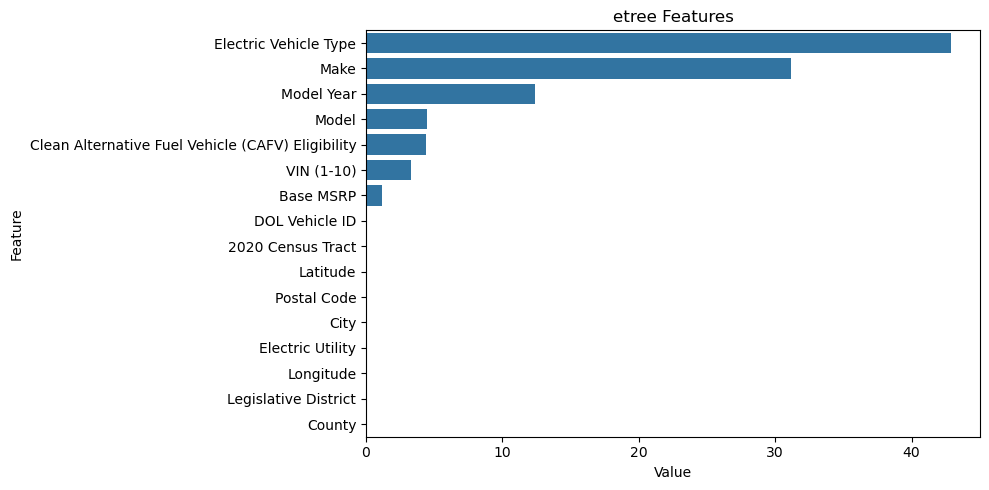

In [59]:
etree = CatBoostRegressor()
x = newtrain.drop('Electric_Range', axis = 1)
y = newtrain['Electric_Range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)
y_pred = etree.fit(x_train, y_train).predict(x_test)
feature_imp = pd.DataFrame(sorted(zip(etree.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('etree Features')
plt.tight_layout()
plt.show()

In [156]:
solution = pd.DataFrame({'Electric_Range' : y_pred})
solution.to_csv('Solution.csv', index = False)